In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # 이미지는 기본적으로 2차원 배열이기 때문
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


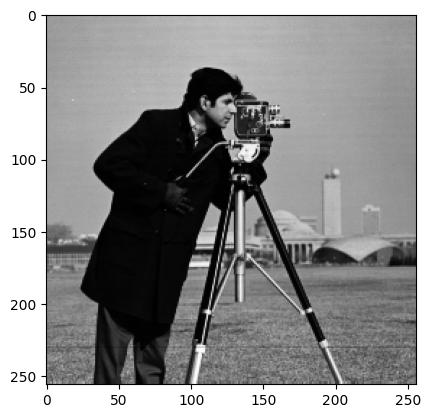

In [2]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/camera.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap = 'gray')

In [3]:
LUT = np.zeros(256, dtype = np.ubyte)

In [5]:
gPoint = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

In [10]:
for i in range(256):
  val = 255 * (np.float32(i)/128 - 1) * (np.float32(i)/ 128 - 1)
  LUT[i] = saturation(val);

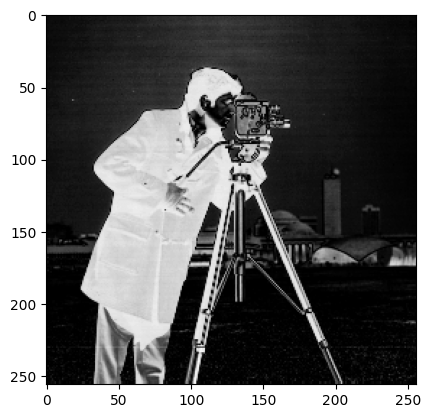

In [8]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    gPoint[h, w] = LUT[gImg[h, w]]

plt.imshow(gPoint, cmap = 'gray')

(256, 256, 3)
(256, 256)


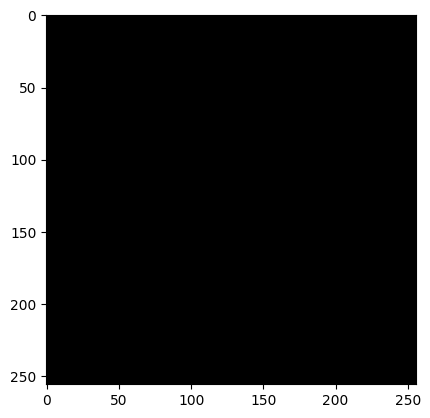

In [11]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/background.bmp')
print(img.shape)
gImg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg2.shape)
plt.imshow(gImg2, cmap = 'gray')

In [13]:
print(gImg2[100, 100])

50


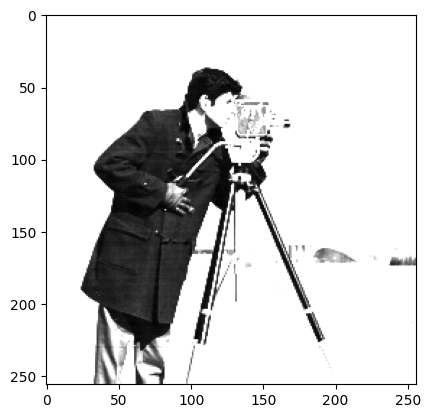

In [17]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    val = np.float32(gImg[h, w]) / np.float32(gImg2[h, w])
    gPoint[h, w] = saturation(val * 255);

plt.imshow(gPoint, cmap = 'gray')
# cv2_imshow(gPoint)